In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [3]:
ls P_magnitude_models_evid_C1.0_e0.1_9features/

B206_NGB_summary_df.csv       YHH_test_summary_df.csv
B206.SVR.joblib               YHH.train.scaler.joblib
B206_test_summary_df.csv      YHH_train_summary_df.csv
B206.train.scaler.joblib      YHL_NGB_summary_df.csv
B206_train_summary_df.csv     YHL.SVR.joblib
B207_NGB_summary_df.csv       YHL_test_summary_df.csv
B207.SVR.joblib               YHL.train.scaler.joblib
B207_test_summary_df.csv      YHL_train_summary_df.csv
B207.train.scaler.joblib      YJC_NGB_summary_df.csv
B207_train_summary_df.csv     YJC.SVR.joblib
B208_NGB_summary_df.csv       YJC_test_summary_df.csv
B208.SVR.joblib               YJC.train.scaler.joblib
B208_test_summary_df.csv      YJC_train_summary_df.csv
B208.train.scaler.joblib      YLA.SVR.joblib
B208_train_summary_df.csv     YLA_test_summary_df.csv
B944_NGB_summary_df.csv       YLA.train.scaler.joblib
B944.SVR.joblib               YLA_train_summary_df.csv
B944_test_summary_df.csv      YLT_NGB_summary_df.csv
B944.train.scaler.joblib      YLT.SVR.joblib
B944_trai

In [4]:
stat_summary_df = pd.read_csv(f'{fdir}/stat_results_df.csv')
stat_summary_df.tail()

,Unnamed: 0,index,test_mse,test_r2,train_mse,train_r2,ngb_mse,ngb_r2,train_count,test_count,ngb_count
31,31,YJC,0.065698,0.698650,0.039591,0.845237,0.247436,0.357328,367.0,93.0,42.0
32,32,B944,0.075895,0.692700,0.065664,0.749355,0.334863,-0.504504,334.0,97.0,24.0
33,33,YPC,0.033338,0.862827,0.027719,0.884871,NaN,NaN,336.0,84.0,1.0
34,34,YPK,0.033104,0.891931,0.028809,0.917153,0.130384,0.333968,282.0,61.0,15.0
35,35,B945,0.063078,0.788546,0.016020,0.954159,0.070316,0.604715,239.0,52.0,63.0


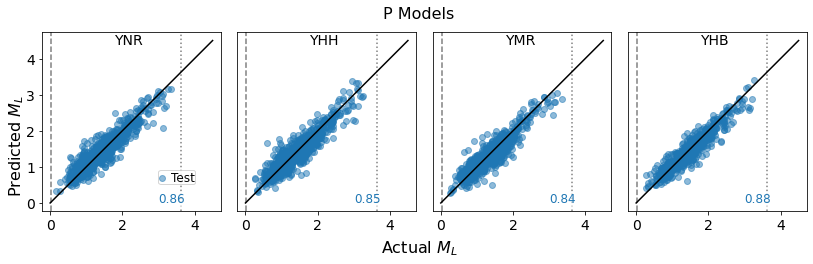

In [11]:
fdir = 'P_magnitude_models_evid_C1.0_e0.1_9features'
selected_df = stat_summary_df[stat_summary_df['index'].isin(["YNR", "YMR", "YHB", "YHH"])]
n_stats = len(selected_df)
n_cols = n_stats
n_rows = 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 3.2), constrained_layout=True)
axes = axes.flatten()
cnt = 0
for cnt, station in enumerate(selected_df['index']):
    # Read in data
    test_df = pd.read_csv(f"{fdir}/{station}_test_summary_df.csv")
    train_df = pd.read_csv(f"{fdir}/{station}_train_summary_df.csv")
    # Some stations do not have NGB examples
    ngb_df=None
#     try:
#         ngb_df = pd.read_csv(f"{fdir}/{station}_NGB_summary_df.csv")
#     except:
#         ndb_df = None

    
    # Ticks
    ax = axes[cnt]
    if cnt < n_stats-n_cols:
        ax.set_xticks([])
    else:
        ax.set_xticks([0, 2, 4])
    if cnt % n_cols != 0:
        ax.set_yticks([])

    ax.scatter(test_df['magnitude'], test_df['predicted_magnitude'], label="Test", color="C0", alpha=0.5)
    if ngb_df is not None:
        ax.scatter(ngb_df['magnitude'], ngb_df['predicted_magnitude'], label="NGB", color="C1", alpha=0.5)
    ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
    max_ls = "--"
    if len(train_df[train_df.magnitude>4.3]) > 0:
        max_ls = ":"    
    ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

    ax.plot(np.arange(0, 5, 0.5), np.arange(0, 5, 0.5), color="k")
    ax.text(1.8, 4.4, station, fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=8)

#     ax.text(2.9, 0.2, 
#         f"Test R$^2$={stat_summary_df.iloc[cnt]['test_r2']:1.2f}\nNGB R$^2$={stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}",
#            fontsize=11,
#            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(3.0, 0.01, f"{selected_df.iloc[cnt]['test_r2']:1.2f}", color="C0", fontsize=12,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))
    if ngb_df is not None:
        ax.text(3.8, 0.01, f"{selected_df.iloc[cnt]['ngb_r2']:1.2f}", color="C1", fontsize=12,
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

    ax.set_aspect('equal', adjustable='box')
    
fig.supxlabel(r"Actual $M_L$", fontsize=16)
fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
#fig.suptitle(f"C={C}, $\epsilon$={epsilon}", y=0.91, fontsize=12)
fig.suptitle("P Models", fontsize=16, y=1.1)
axes[0].legend(loc=(0.65, 0.15), fontsize=12, handletextpad=0.5, borderpad=0.05, 
           borderaxespad=0.05, handlelength=0.5, labelspacing=0.2)
#fig.tight_layout()
plt.savefig('../quals_figs/P_station_mag_scatter_equal_nongb.png', dpi=300, bbox_inches='tight')

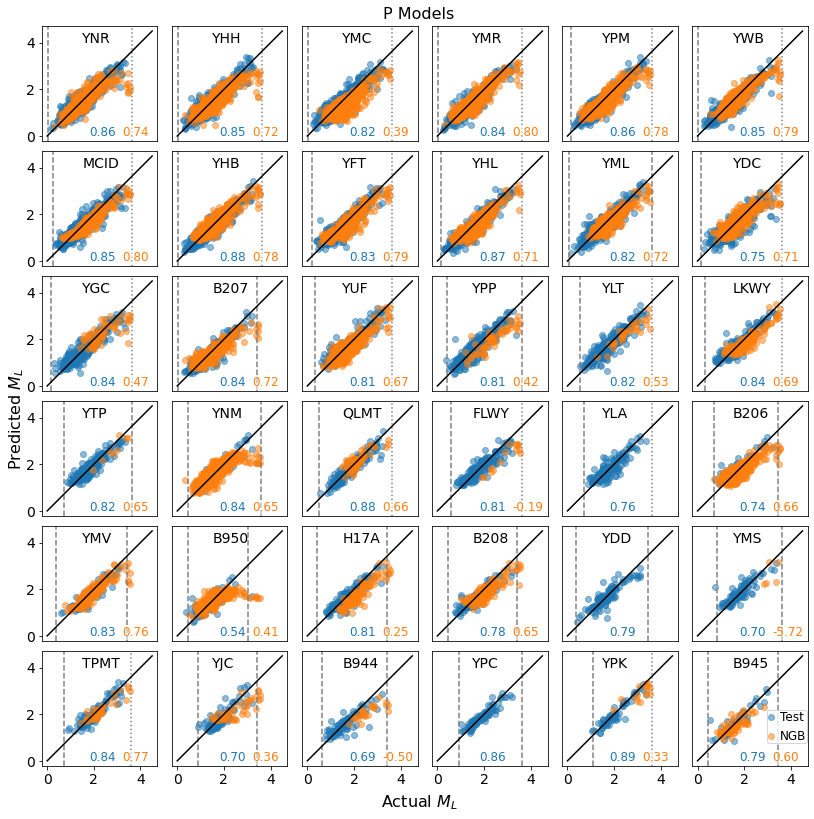

In [170]:
fdir = 'P_magnitude_models_evid_C1.0_e0.1_9features'
n_stats = len(stat_summary_df)
n_cols = 6
n_rows = (n_stats)//n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(11, 11), constrained_layout=True)
axes = axes.flatten()
cnt = 0
for cnt, station in enumerate(stat_summary_df['index']):
    # Read in data
    test_df = pd.read_csv(f"{fdir}/{station}_test_summary_df.csv")
    train_df = pd.read_csv(f"{fdir}/{station}_train_summary_df.csv")
    # Some stations do not have NGB examples
    ngb_df=None
    try:
        ngb_df = pd.read_csv(f"{fdir}/{station}_NGB_summary_df.csv")
    except:
        ndb_df = None

    
    # Ticks
    ax = axes[cnt]
    if cnt < n_stats-n_cols:
        ax.set_xticks([])
    else:
        ax.set_xticks([0, 2, 4])
    if cnt % n_cols != 0:
        ax.set_yticks([])

    ax.scatter(test_df['magnitude'], test_df['predicted_magnitude'], label="Test", color="C0", alpha=0.5)
    if ngb_df is not None:
        ax.scatter(ngb_df['magnitude'], ngb_df['predicted_magnitude'], label="NGB", color="C1", alpha=0.5)
    ax.axvline(np.min(train_df.magnitude), color="gray", linestyle="--")
    max_ls = "--"
    if len(train_df[train_df.magnitude>4.3]) > 0:
        max_ls = ":"    
    ax.axvline(np.max(train_df[train_df.magnitude < 4.36].magnitude), color="gray", linestyle=max_ls)

    ax.plot(np.arange(0, 5, 0.5), np.arange(0, 5, 0.5), color="k")
    ax.text(1.5, 4.0, station, fontsize=14) #, bbox={"facecolor":"white", "alpha":0.5}

    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=8)

#     ax.text(2.9, 0.2, 
#         f"Test R$^2$={stat_summary_df.iloc[cnt]['test_r2']:1.2f}\nNGB R$^2$={stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}",
#            fontsize=11,
#            bbox=dict(facecolor='white', alpha=0.5))

    ax.text(1.8, 0.01, f"{stat_summary_df.iloc[cnt]['test_r2']:1.2f}", color="C0", fontsize=12)
    if ngb_df is not None:
        ax.text(3.2, 0.01, f"{stat_summary_df.iloc[cnt]['ngb_r2']:1.2f}", color="C1", fontsize=12,
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='white', pad=0.1))

    ax.set_aspect('equal', adjustable='box')
    
fig.supxlabel(r"Actual $M_L$", fontsize=16)
fig.supylabel(r"Predicted $M_L$", fontsize=16, x=-0.02)
#fig.suptitle(f"C={C}, $\epsilon$={epsilon}", y=0.91, fontsize=12)
fig.suptitle("P Models", fontsize=16, y=1.02)
plt.legend(loc=(0.65, 0.2), fontsize=12, handletextpad=0.5, borderpad=0.05, 
           borderaxespad=0.05, handlelength=0.5)
#fig.tight_layout()
plt.savefig('../proposal_figs/P_station_mag_scatter_equal.png', dpi=300, bbox_inches='tight')